# W200 Project 2
## Data analysis: Mapping the Heating Data of Cities on a Map

### 1. Introduction
This notebook attempts to use geopandas to visualize the heating pattern across cities.  If time permits, exploration on merging with UN city-based data will be explored.

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# loads the "largest_city_list.csv" and "metadata_largest_city.csv"
city_list = pd.read_csv('largest_city_list.csv')
metadata = pd.read_csv('metadata_largest_city.csv', index_col = 'City')

# a fucntion to load the 3 523 individual city csv:
def retrieve_city_data():
    '''
    Reads in all city based csv files.  Run at start of session by default.
    '''
    city_data = {}
    
    for city in city_list.city:
        filename = city + '.csv'
        city_data.update({city: pd.read_csv(filename)})
    
    return city_data

### 2. Preparing the data
This is basically repeating the steps done for Part 3 of the original notebook file analyzing regional heating patterns.

In [2]:
# base data with all needed columns included
base_data = metadata.copy()
base_data['Warming_since_1960'] = city_list.set_index('city').warming_since_1960

# adds the north/south hemisphere categorization
base_data['Hemisphere'] = 'north'
base_data.loc[base_data.Latitude < 0, 'Hemisphere'] = 'south'

# adds the tropical/sub-tropical/temperate/frigid zones categorization
base_data['Climate_zone'] = 'tropical'
base_data.loc[(base_data.Latitude < -23.43644) | (base_data.Latitude > 23.43644), 'Climate_zone'] = 'sub-tropical'
base_data.loc[(base_data.Latitude < -35) | (base_data.Latitude > 35), 'Climate_zone'] = 'temperate'
base_data.loc[(base_data.Latitude < -66.5) | (base_data.Latitude > 66.5), 'Climate_zone'] = 'frigid'

# adds the natural time zones.
base_data['Natural_time_zone'] = 'UTC'
for i in range(12):
    base_data.loc[(base_data.Longitude < (-7.5 - 15 * i)), 'Natural_time_zone'] = 'UTC-' + str(i+1)
    base_data.loc[(base_data.Longitude > (7.5 + 15 * i)), 'Natural_time_zone'] = 'UTC+' + str(i+1)
    
print("Showing the value counts of the added columns")
for column in ['Hemisphere', 'Climate_zone', 'Natural_time_zone']:
    print(f"\nThe following is the value counts of column {column}:")
    print(f"{base_data[column].value_counts()}")

Showing the value counts of the added columns

The following is the value counts of column Hemisphere:
north    2907
south     616
Name: Hemisphere, dtype: int64

The following is the value counts of column Climate_zone:
tropical        1376
temperate       1249
sub-tropical     896
frigid             2
Name: Climate_zone, dtype: int64

The following is the value counts of column Natural_time_zone:
UTC+8     395
UTC+5     385
UTC       320
UTC+2     306
UTC+1     295
UTC+7     295
UTC-5     235
UTC+9     201
UTC-3     184
UTC+3     181
UTC+6     171
UTC-6     127
UTC-7     115
UTC-8      89
UTC-4      79
UTC+4      64
UTC-1      36
UTC-2      18
UTC+10     16
UTC+12      7
UTC+11      3
UTC-10      1
Name: Natural_time_zone, dtype: int64


### 4. Geo plotting (Part 1)
(i) Plotting the temperature rise (warming since 1960) for cities using a map.

In [33]:
# loading the data frame to geo-pandas

gdf = gpd.GeoDataFrame(base_data.Warming_since_1960, geometry=gpd.points_from_xy(base_data.Longitude, base_data.Latitude))

gdf

,Warming_since_1960,geometry
City,,
A Coruña,2.37,POINT (-8.73000 42.59000)
Aachen,2.83,POINT (6.34000 50.63000)
Aalborg,2.84,POINT (10.33000 57.05000)
Aba,1.55,POINT (8.07000 5.63000)
Abadan,2.89,POINT (48.00000 29.74000)
...,...,...
Zouxian,2.23,POINT (117.35000 36.17000)
Zunyi,0.84,POINT (106.36000 28.13000)
Zurich,2.85,POINT (8.29000 47.42000)


Text(0.5, 1.0, 'Global Warming since 1960 in Largest Cities')

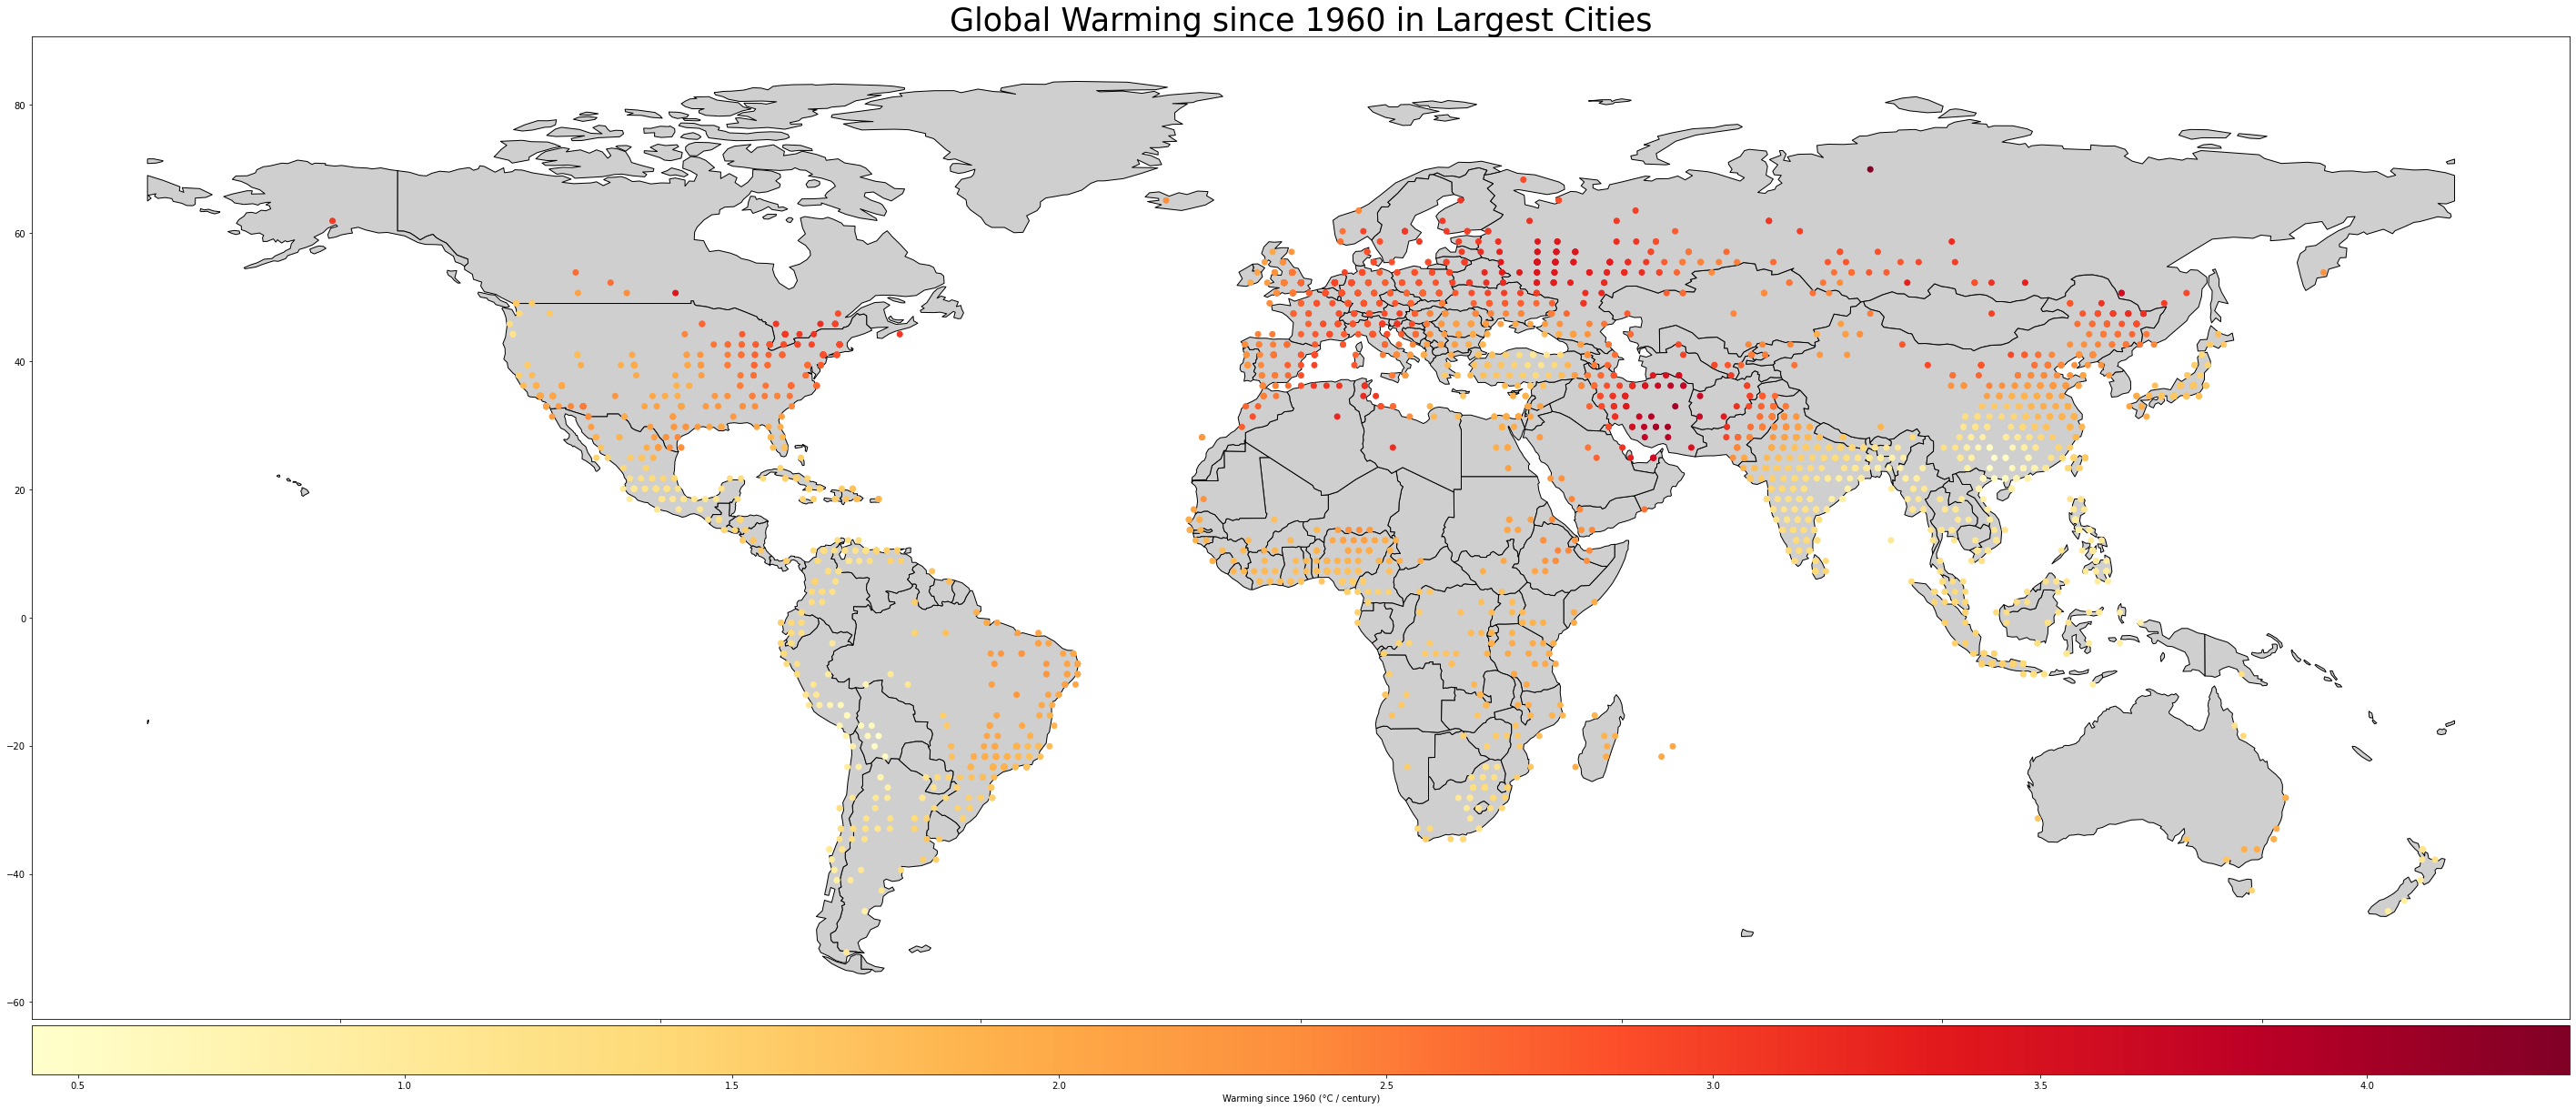

In [64]:
# plotting the graph

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent != 'Antarctica'].plot(color="#cfcfcf", edgecolor='black', figsize=(50, 50))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

gdf.plot(ax=ax, column='Warming_since_1960', cmap='YlOrRd', legend=True, cax=cax, 
         legend_kwds={'label': "Warming since 1960 (°C / century)",
                      'orientation': "horizontal",
                      'shrink': 0.9})

ax.set_title("Global Warming since 1960 in Largest Cities", fontsize=35)